In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
df=pd.read_csv('mediacompany.csv')

In [ ]:
df.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000,0.0
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000,NaN
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177,NaN
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000,NaN
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000,NaN
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000,NaN
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000,NaN
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000,NaN


In [ ]:
df.drop('Unnamed: 7',axis=1,inplace=True)

In [ ]:
df.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [ ]:
df['Date'].unique()# shows start from 1st march to 19 may

array(['3/1/2017', '3/2/2017', '3/3/2017', '3/4/2017', '3/5/2017',
       '3/6/2017', '3/7/2017', '3/8/2017', '3/9/2017', '3/10/2017',
       '3/11/2017', '3/12/2017', '3/13/2017', '3/14/2017', '3/15/2017',
       '3/16/2017', '3/17/2017', '3/18/2017', '3/19/2017', '3/20/2017',
       '3/21/2017', '3/22/2017', '3/23/2017', '3/24/2017', '3/25/2017',
       '3/26/2017', '3/27/2017', '3/28/2017', '3/29/2017', '3/30/2017',
       '3/31/2017', '4/1/2017', '4/2/2017', '4/3/2017', '4/4/2017',
       '4/5/2017', '4/6/2017', '4/7/2017', '4/8/2017', '4/9/2017',
       '4/10/2017', '4/11/2017', '4/12/2017', '4/13/2017', '4/14/2017',
       '4/15/2017', '4/16/2017', '4/17/2017', '4/18/2017', '4/19/2017',
       '4/20/2017', '4/21/2017', '4/22/2017', '4/23/2017', '4/24/2017',
       '4/25/2017', '4/26/2017', '4/27/2017', '4/28/2017', '4/29/2017',
       '4/30/2017', '5/1/2017', '5/2/2017', '5/3/2017', '5/4/2017',
       '5/5/2017', '5/6/2017', '5/7/2017', '5/8/2017', '5/9/2017',
       '5/10/2017',

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
from datetime import date
d0=date(2017,2,28)
df['days']=df['Date'].dt.date-d0

In [ ]:
df

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,days
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days
...,...,...,...,...,...,...,...,...
75,2017-05-15,313945,1808684,2226788,1398052759,1,0,76 days
76,2017-05-16,185689,1814227,2199844,1311961223,1,0,77 days
77,2017-05-17,142260,1755803,2225752,1248266254,1,0,78 days
78,2017-05-18,135871,1749654,2302789,1284859759,1,0,79 days


In [ ]:
df['days']=df['days'].astype('str')

In [ ]:
df['days']=df['days'].apply(lambda x:x[:2]).astype('int')

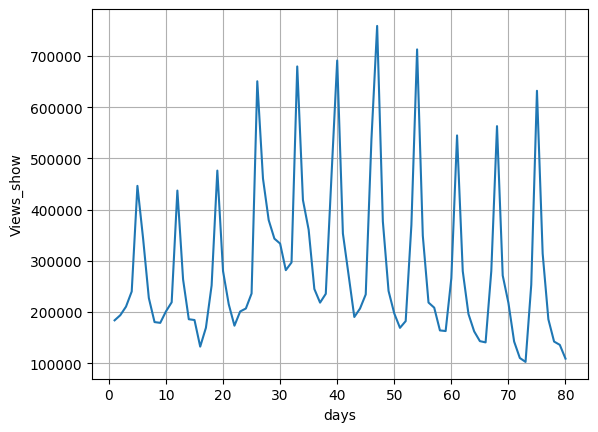

In [ ]:
sns.lineplot(x=df['days'],y=df['Views_show'])
plt.grid()

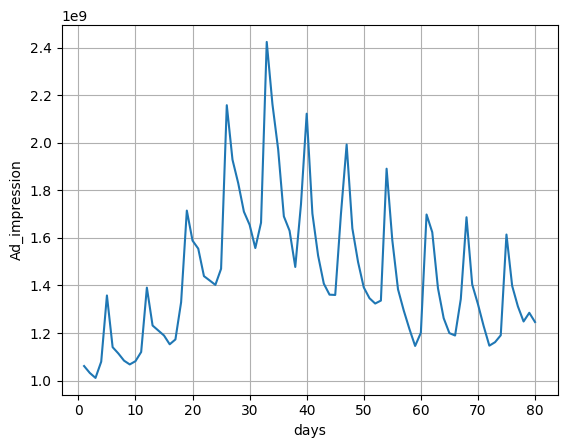

In [ ]:
sns.lineplot(x=df['days'],y=df['Ad_impression'])
plt.grid()

<Axes: xlabel='days', ylabel='Views_platform'>

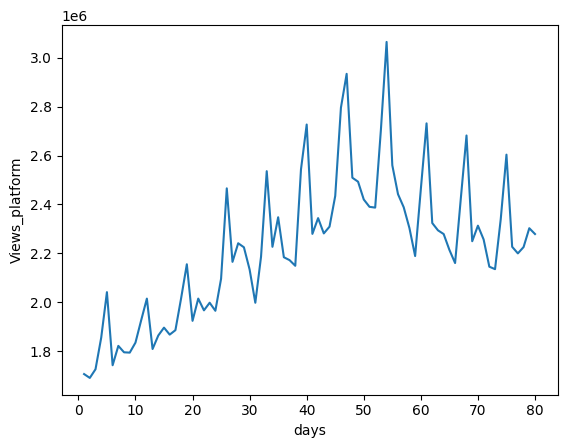

In [ ]:
sns.lineplot(x=df['days'],y=df['Views_platform'])

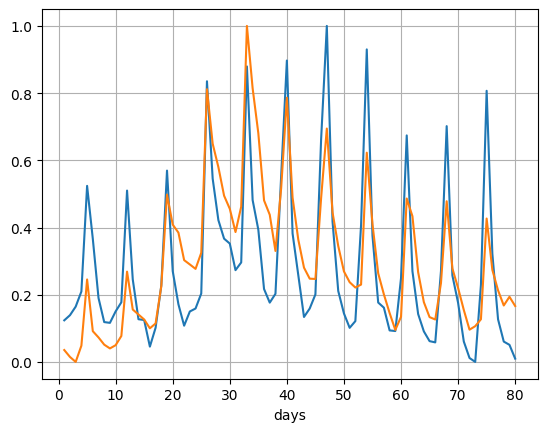

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
y=scaler.fit_transform(df['Views_show'].values.reshape(-1,1))
y1=scaler.fit_transform(df['Ad_impression'].values.reshape(-1,1))
y=y[:,0]
y1=y1[:,0]
sns.lineplot(x=df['days'],y=y)
sns.lineplot(x=df['days'],y=y1)
plt.grid()

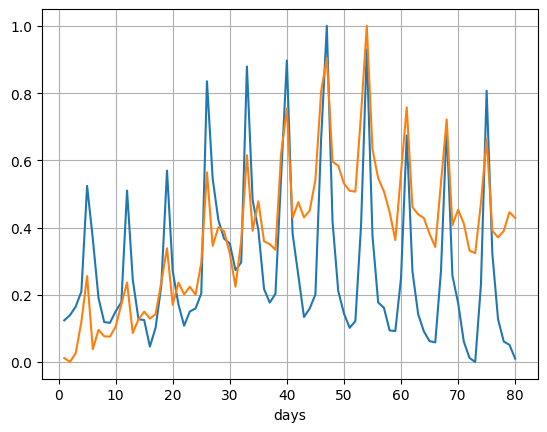

In [ ]:
y=scaler.fit_transform(df['Views_show'].values.reshape(-1,1))
y1=scaler.fit_transform(df['Views_platform'].values.reshape(-1,1))
y=y[:,0]
y1=y1[:,0]
sns.lineplot(x=df['days'],y=y)
sns.lineplot(x=df['days'],y=y1)
plt.grid()

In [ ]:
df['weekday']=df['Date'].dt.weekday
df['weekdays_cat']=df['weekday'].astype('category')

<Axes: xlabel='weekdays_cat', ylabel='Views_show'>

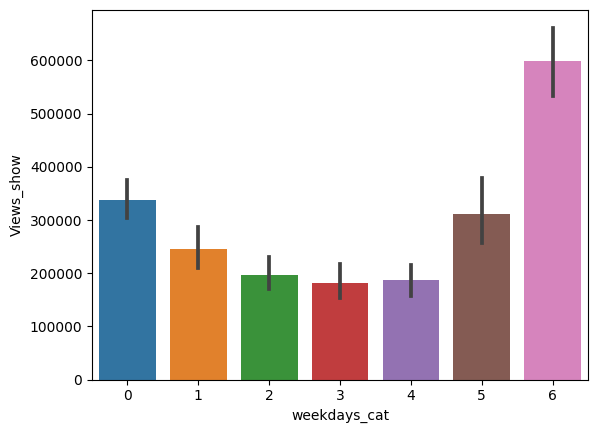

In [ ]:
sns.barplot(x=df['weekdays_cat'],y=df['Views_show'])

<Axes: xlabel='weekdays_cat', ylabel='Ad_impression'>

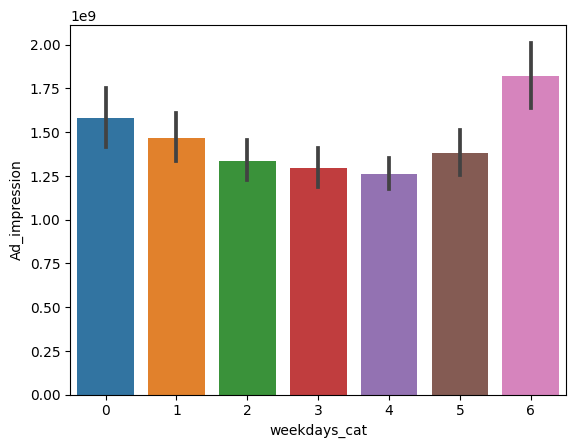

In [ ]:
sns.barplot(x=df['weekdays_cat'],y=df['Ad_impression'])

In [ ]:
X=df[['Visitors']]
Y=df[['Views_show']]

In [ ]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     31.33
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.12e-07
Time:                        13:44:28   Log-Likelihood:                 15.964
No. Observations:                  80   AIC:                            -27.93
Df Residuals:                      78   BIC:                            -23.16
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6434      0.168     -3.841      0.0

In [ ]:
# now using visitors and weekday as feature
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df[['Visitors','weekday']]
X['y']=Y

<ipython-input-149-b98197e3b65d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=Y


In [ ]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=X['y']
X=X.drop('y',axis=1)

In [ ]:
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.358
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     21.44
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.98e-08
Time:                        13:44:28   Log-Likelihood:                -95.811
No. Observations:                  80   AIC:                             197.6
Df Residuals:                      77   BIC:                             204.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.091   -7.6e-17      1.0

In [ ]:
def find(x):
  if x<5:
    return 0
  else:
    return 1
df['weekend']=df['weekday'].apply(find)

In [ ]:
X=df[['Visitors','weekend']]
X['y']=df['Views_show']

<ipython-input-153-cc77ed6d55c5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=df['Views_show']


In [ ]:
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=X['y']
X=X.drop('y',axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           2.51e-12
Time:                        13:44:28   Log-Likelihood:                -85.764
No. Observations:                  80   AIC:                             177.5
Df Residuals:                      77   BIC:                             184.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6.939e-18      0.081  -8.61e-17      1.0

In [ ]:
X=df[['Visitors','weekend','Character_A']]
X['y']=df['Views_show']
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=X['y']
X=X.drop('y',axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.53e-14
Time:                        13:45:52   Log-Likelihood:                -78.252
No. Observations:                  80   AIC:                             164.5
Df Residuals:                      76   BIC:                             174.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.255e-17      0.074  -3.06e-16      

<ipython-input-155-71bf383fb484>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=df['Views_show']


In [ ]:
X=df[['Visitors','weekend','Character_A','Ad_impression']]
X['y']=df['Views_show']
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=X['y']
X=X.drop('y',axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     76.40
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.10e-25
Time:                        15:10:09   Log-Likelihood:                -48.544
No. Observations:                  80   AIC:                             107.1
Df Residuals:                      75   BIC:                             119.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.255e-17      0.051   -4.4e-16

<ipython-input-156-d5aef0329622>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=df['Views_show']


In [ ]:
X=df[['weekend','Character_A','Ad_impression']]
X['y']=df['Views_show']
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=X['y']
X=X.drop('y',axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.05e-26
Time:                        15:11:55   Log-Likelihood:                -48.605
No. Observations:                  80   AIC:                             105.2
Df Residuals:                      76   BIC:                             114.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.255e-17      0.051  -4.43e-16

<ipython-input-159-a7d035057506>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=df['Views_show']


In [ ]:
X=df[['weekend','Character_A','Ad_impression','Cricket_match_india','Views_platform']]
X['y']=df['Views_show']
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=X['y']
X=X.drop('y',axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

#inclusion of cricket match,Views_platform doesnt match

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     62.29
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.94e-25
Time:                        15:15:26   Log-Likelihood:                -47.499
No. Observations:                  80   AIC:                             107.0
Df Residuals:                      74   BIC:                             121.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2.255e-17    

<ipython-input-163-ed8c6338a7b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=df['Views_show']


In [ ]:
X=df[['weekend','Character_A','Ad_impression']]
X['y']=df['Views_show']
X=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
Y=X['y']
X=X.drop('y',axis=1)
X=sm.add_constant(X)
model=sm.OLS(Y,X).fit()
print(model.summary())

#inclusion of cricket match,Views_platform doesnt match

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.803
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     103.0
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.05e-26
Time:                        15:22:36   Log-Likelihood:                -48.605
No. Observations:                  80   AIC:                             105.2
Df Residuals:                      76   BIC:                             114.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -2.255e-17      0.051  -4.43e-16

<ipython-input-178-99e1ddc7db3b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['y']=df['Views_show']


In [ ]:
Y_pred=model.predict(X)

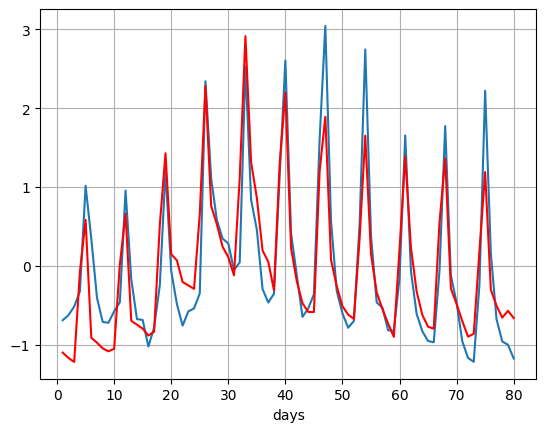

In [ ]:
y=scaler.fit_transform(df['Views_show'].values.reshape(-1,1))
y=y[:,0]
sns.lineplot(x=df['days'],y=y)
sns.lineplot(x=df['days'],y=Y_pred,color='r')
plt.grid()

# By including these 3 important features('weekend','Character_A','Ad_impression') only we can get r2score of 80